In [2]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


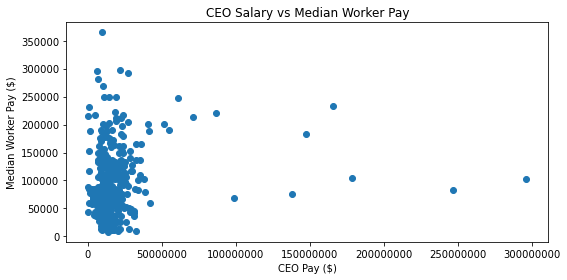

In [19]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Salary vs Median Worker Pay")
#plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEO_vs_worker.png")

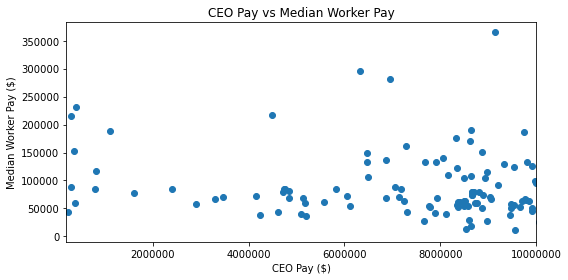

In [20]:
x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Pay vs Median Worker Pay")
plt.xlim([200000,10000000])
#plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/Lower_CEO_vs_Worker.png")

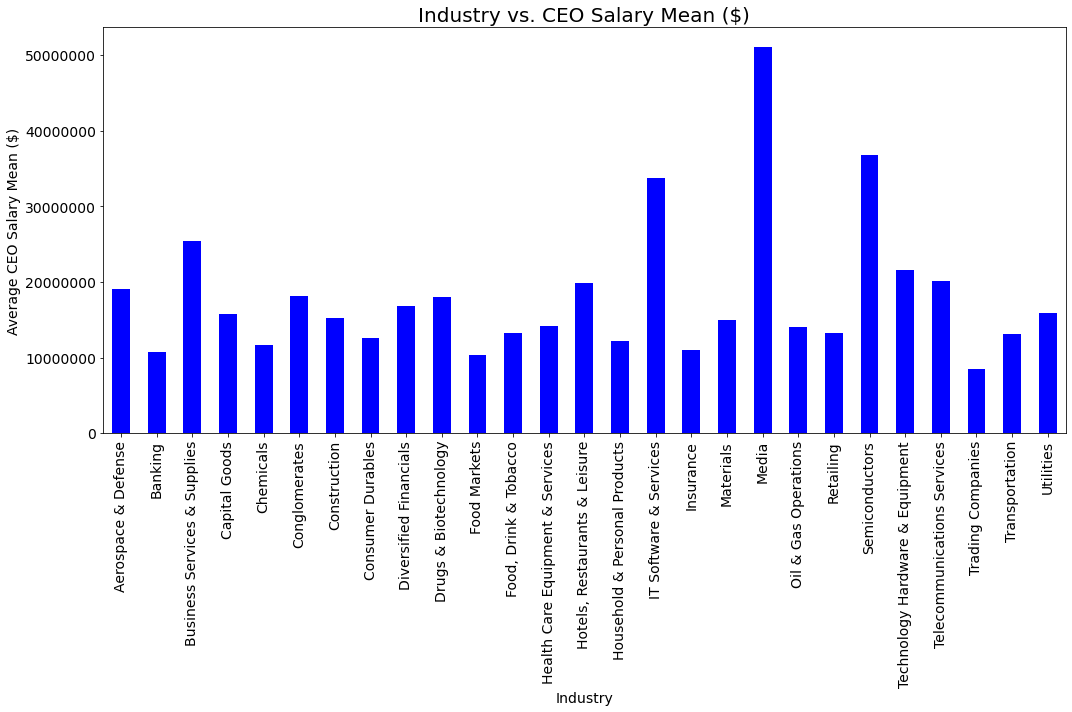

In [21]:
#Do industries that CEOs work in and their workers work in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Average CEO Salary Mean ($)",fontsize = 14)
plt.title("Industry vs. CEO Salary Mean ($)",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()

# Save the figure
plt.savefig("../Visuals/CEO_per_industry.png")

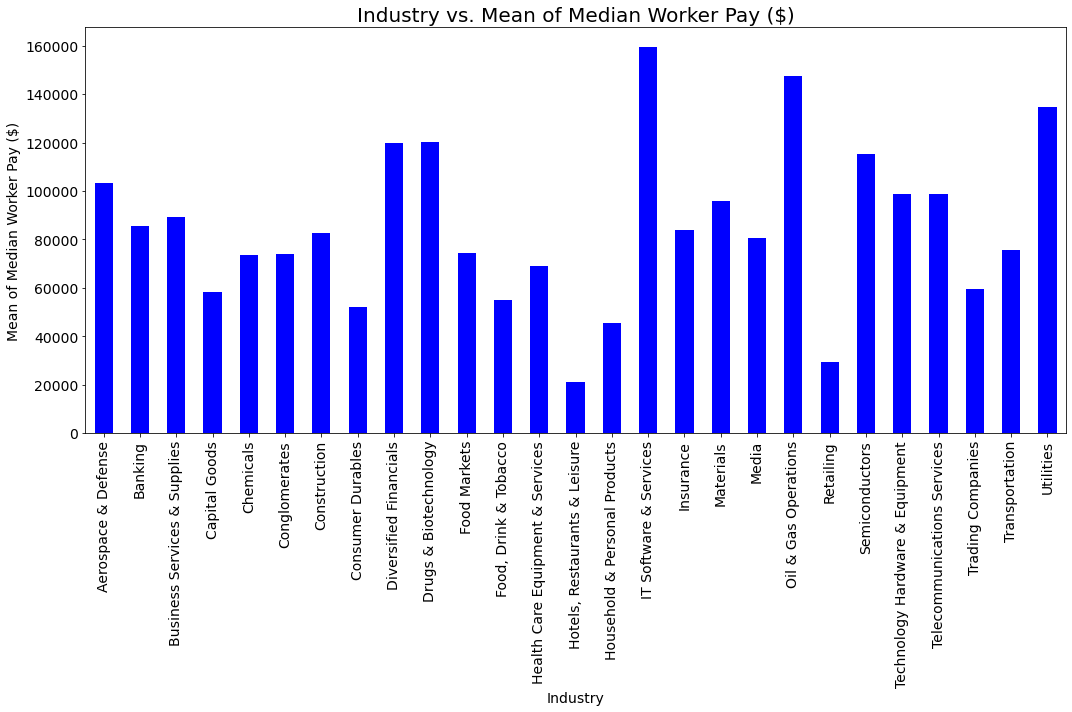

In [22]:
#Do industries that CEOs work in and their workers work in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["Median Worker Pay"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Mean of Median Worker Pay ($)",fontsize = 14)
plt.title("Industry vs. Mean of Median Worker Pay ($)",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()

# Save the figure
plt.savefig("../Visuals/worker_per_industry.png")

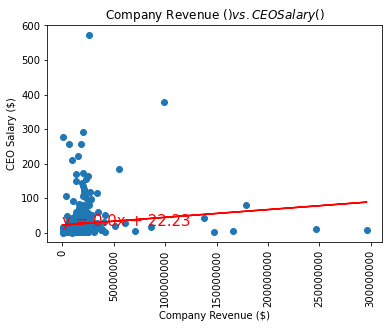

In [23]:
#Do CEOs and their workers earn more as their companies earn more?
#formatting x axis
#weird title

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel('Company Revenue ($)')
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.show()  
xval = merged_df["CEO Salary"]
yval = merged_df["Revenue (Billions)"]
linreg(xval,yval,"Company Revenue ($) vs. CEO Salary ($)","CEO Salary ($)",(0,20))

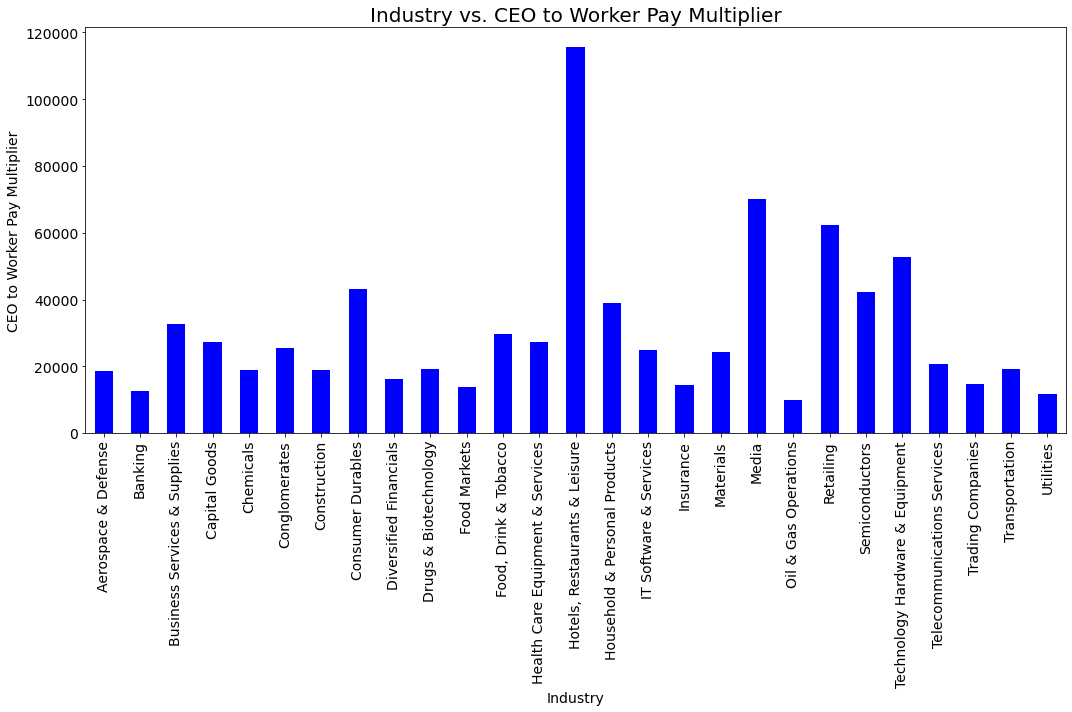

In [24]:
# Which industries have the highest discrepancies between CEO salary and worker pay?
industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary to Worker Pay Multiplier"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("CEO to Worker Pay Multiplier",fontsize = 14)
plt.title("Industry vs. CEO to Worker Pay Multiplier",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
plt.show()


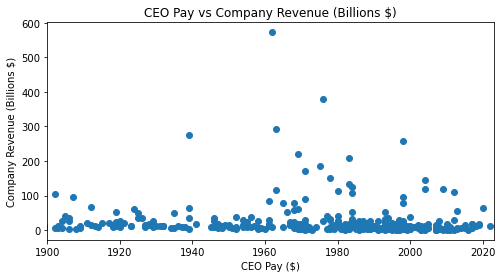

In [26]:
#Do companies founded before 1970 earn more than companies founded after 1970?
#I picked 1970 arbitrarily lol it can change but you get what I'm going for
#Need to change X axis range

x_values = merged_df["Year Founded"]
y_values = merged_df["Revenue (Billions)"]

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Company Revenue (Billions $)")
plt.title("CEO Pay vs Company Revenue (Billions $)")
plt.xlim([1900, 2023])
#plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')

# Save the figure
plt.savefig("../Visuals/CEO_revenue.png")